#### Import Python libraries we need

In [ ]:
#data handling
import pandas as pd
import numpy as np

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.__version__

'2.1.4'

In [4]:
import importlib.util
print(importlib.util.find_spec("seaborn") is not None)


True


In [5]:
print(importlib.util.find_spec("matplotlib") is not None)

True


In [6]:
print(importlib.util.find_spec("sklearn") is not None)

True


In [8]:
#for preprocessing daata libs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MinMaxScaler

# For feature selection libs
from sklearn.feature_selection import mutual_info_classif

# For classification libs
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrices handlding
from sklearn.metrics import balanced_accuracy_score,f1_score,precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score

In [9]:
#read data directly from a folder
file_url = 'cancer_gene_expression.csv'
dataframe = pd.read_csv(file_url)

In [10]:
dataframe

,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,...,gene_7992,gene_7993,gene_7994,gene_7995,gene_7996,gene_7997,gene_7998,gene_7999,gene_8000,Cancer_Type
0,0.0,0.000000,0.0,2.088413,0.0,0.0,0.0,0.0,0.550605,2.815760,...,11.558803,8.881802,6.014840,6.643534,11.740624,7.065012,9.932659,6.928584,2.088413,KIRC
1,0.0,0.000000,0.0,3.205955,0.0,0.0,0.0,0.0,0.425244,2.354396,...,11.062829,9.032864,5.054193,6.432320,12.104985,7.300746,9.872796,5.039231,2.448002,KIRC
2,0.0,0.000000,0.0,4.746646,0.0,0.0,0.0,0.0,2.639417,1.657091,...,12.497640,7.198160,0.943434,7.371690,11.202356,8.426588,11.176890,3.119738,4.433988,BRCA
3,0.0,0.000000,0.0,1.173191,0.0,0.0,0.0,0.0,1.527371,2.732899,...,11.261713,8.725676,6.300418,6.036451,11.732303,7.559469,9.596453,2.863046,3.380342,KIRC
4,0.0,0.000000,0.0,1.366532,0.0,0.0,0.0,0.0,0.000000,3.388355,...,12.241965,7.685204,5.142948,6.355788,11.493950,8.139444,10.189256,6.544487,0.839395,COAD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.0,2.933384,0.0,1.683921,0.0,0.0,0.0,0.0,0.635336,1.252839,...,9.985842,9.469967,4.225275,6.955336,11.722206,7.309940,10.986119,6.396848,1.252839,BRCA
797,0.0,0.000000,0.0,2.772625,0.0,0.0,0.0,0.0,0.534759,3.761764,...,12.334681,8.157327,1.482797,6.758183,11.403838,9.005347,11.012045,5.386625,1.697640,COAD
798,0.0,0.408277,0.0,1.854754,0.0,0.0,0.0,0.0,0.000000,0.986520,...,11.671992,8.859616,6.393828,6.427115,11.596586,7.454127,10.718533,5.507417,1.398131,BRCA
799,0.0,0.639232,0.0,3.226971,0.0,0.0,0.0,0.0,1.921322,0.639232,...,12.237087,5.753976,4.192478,6.614875,11.183245,7.544261,10.649382,5.282158,0.639232,BRCA


#### Data Checking & Cleaning

In [12]:
# Check the number of samples and features
# Note:the last column contain the label of this data set so we can aware of it.
print(dataframe.shape)

(801, 8001)


In [13]:
#let's check some of the columns (first, second)
print(dataframe.columns[0:2])

Index(['gene_1', 'gene_2'], dtype='object')


In [14]:
dataframe[0:2]

,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,...,gene_7992,gene_7993,gene_7994,gene_7995,gene_7996,gene_7997,gene_7998,gene_7999,gene_8000,Cancer_Type
0,0.0,0.0,0.0,2.088413,0.0,0.0,0.0,0.0,0.550605,2.815760,...,11.558803,8.881802,6.014840,6.643534,11.740624,7.065012,9.932659,6.928584,2.088413,KIRC
1,0.0,0.0,0.0,3.205955,0.0,0.0,0.0,0.0,0.425244,2.354396,...,11.062829,9.032864,5.054193,6.432320,12.104985,7.300746,9.872796,5.039231,2.448002,KIRC


In [17]:
dataframe.iloc[:, :2]

,gene_1,gene_2
0,0.0,0.000000
1,0.0,0.000000
2,0.0,0.000000
3,0.0,0.000000
4,0.0,0.000000
...,...,...
796,0.0,2.933384
797,0.0,0.000000
798,0.0,0.408277
799,0.0,0.639232


In [20]:
#Check the labels from the last column of this dataframe
dataframe.columns[-1]

'Cancer_Type'

In [30]:
dataframe.columns[0]

'gene_1'

In [22]:
dataframe.iloc[:,-1]

0      KIRC
1      KIRC
2      BRCA
3      KIRC
4      COAD
       ... 
796    BRCA
797    COAD
798    BRCA
799    BRCA
800    COAD
Name: Cancer_Type, Length: 801, dtype: object

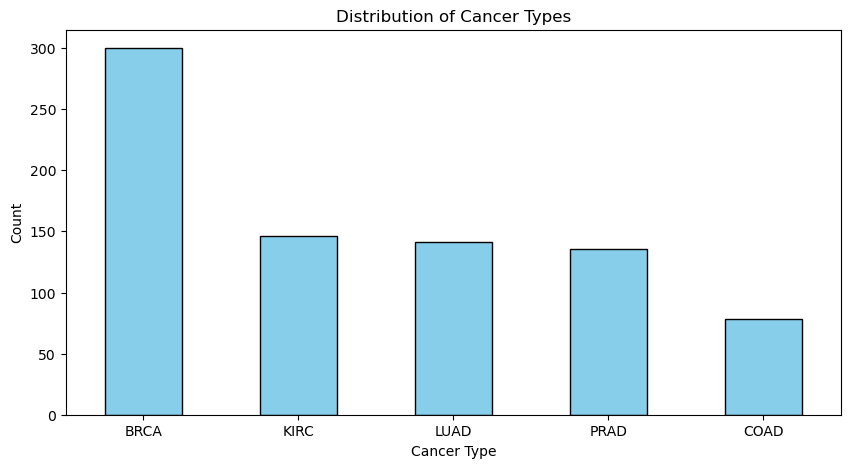

In [24]:
# Count unique values
cancer_counts = dataframe["Cancer_Type"].value_counts()
# Plot bar chart
plt.figure(figsize=(10, 5))
cancer_counts.plot(kind="bar", color="skyblue", edgecolor="black")
# Labels & Title
plt.xlabel("Cancer Type")
plt.ylabel("Count")
plt.title("Distribution of Cancer Types")
plt.xticks(rotation=0)
plt.show()

In [25]:
cancer_counts

Cancer_Type
BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: count, dtype: int64

In [28]:
# Try to find missing values
datanul=dataframe.isnull().sum()
g=[i for i in datanul if i>0]
print('columns with missing values:%d'%len(g))

columns with missing values:0


#### Data preprocesing

In [31]:
# we will now seperate the feature values from the class. 
# we do this because scikit-learn requires that features and class are separated before parsing them to the classifiers.
X=dataframe.iloc[:,0:-1]
y=dataframe.iloc[:,-1]

In [35]:
X.shape, y.shape

((801, 8000), (801,))

We have to encode the labels.
The labels in this dataset are categorical, so we need to convert them into numeric form through a process called encoding. Machine learning models typically require numerical input, making label encoding essential.

In [38]:
# We will use LabelEncoder to convert categorical labels into numeric form, ensuring the data is suitable for machine learning models.
label_encoder = LabelEncoder()
label_encoder.fit(y)
y_encoded = label_encoder.transform(y)
labels = label_encoder.classes_
classes = np.unique(y_encoded)

In [39]:
labels

array(['BRCA', 'COAD', 'KIRC', 'LUAD', 'PRAD'], dtype=object)

In [40]:
classes

array([0, 1, 2, 3, 4])

#### Data Splitting
Next, we will split the data into training and test subsets. The training data is fed into the machine learning model, allowing it to learn and identify patterns that can be used for future predictions. The test data, on the other hand, is used to assess the model's performance after the training phase.

In [41]:
#split data into training and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y_encoded,test_size=0.2,random_state=42)
# Here, 0.2 means that 20% of the data will be used for testing, and the remaining 80% will be used for training.
# random_state=42: Ensures the data split is reproducible, meaning you'll get the same train-test split each time you run the code.

In [43]:
dataframe.iloc[:,0:5].describe()

,gene_1,gene_2,gene_3,gene_4,gene_5
count,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.026642,0.231049,0.010844,2.405459,0.005799
std,0.136850,0.656692,0.153859,0.797236,0.052265
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.898595,0.000000
50%,0.000000,0.000000,0.000000,2.358284,0.000000
75%,0.000000,0.000000,0.000000,2.929355,0.000000
max,1.482332,6.575004,3.778061,4.746646,0.570754


#### Data Normalization
Data normalization is done so that the values are in the same range. This will improve model performance and avoid bias

In [44]:
# scale data between 0 and 1
# MinMaxScaler is used to scale the features of the dataset so that they are in a specific range, typically [0, 1].
min_max_scaler = MinMaxScaler() # Scaling ensures that all features contribute equally to the model and are in the same range.
X_train_norm = min_max_scaler.fit_transform(X_train) # This step returns a normalized version of the training data, stored in X_train_norm
X_test_norm = min_max_scaler.fit_transform(X_test)

#### Feature Selection
Feature selection aims to identify the most relevant features for classification. It is typically performed as a pre-processing step before the actual learning process.
In this tutorial, we use the mutual information algorithm to evaluate the relevance of each feature. The top n features (e.g., the top 300) are then chosen for the machine learning analysis.

#### Feature Selection using Mutual Information

In [47]:
MI = mutual_info_classif(X_train_norm,y_train)
#It helps to identify redundant or irrelevant features, leading to more efficient and accurate models by removing unnecessary variables.
#It returns a list of scores representing the relevance of each feature, which can be used for feature selection in the machine learning pipeline.

In [49]:
# select top n features.
# The code is selecting the top n_features based on the highest mutual information scores,
# allowing you to focus on the most relevant features for your classification task.
n_features = 300
selected_scores_indices = np.argsort(MI)[::-1][0:n_features]


In [52]:
X_train_selected = X_train_norm[:,selected_scores_indices]
X_test_selected = X_test_norm[:,selected_scores_indices]

In [53]:
X_train_selected.shape

(640, 300)

In [54]:
X_test_selected.shape

(161, 300)

#### Classification

Random Forest can handle both multiclass and high-dimensional data. The classification process involves training and testing the model.

Model Training
Training enables the machine learning model to learn from the provided data and recognize patterns that it can apply to predict outcomes for new, unseen data. During the training phase, the model is provided with the training subset. In this tutorial, we will use the Random Forest Classifier.

### Accuracy:
**Accuracy** is the proportion of correct predictions (both true positives and true negatives) out of all predictions.

$$
\text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}
$$

---

### Precision:
**Precision** is the proportion of true positives out of all predicted positives.

$$
\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
$$

---

### Recall:
**Recall** is the proportion of true positives out of all actual positives.

$$
\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$

---

### F1 Score:
**F1 Score** is the harmonic mean of precision and recall. It is useful when you need to balance both precision and recall.

$$
\text{F1} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$


In [57]:
# Random Forest Classifier
# because we are dealing with multiclass data, the one versus rest strategy is used.
# learn to predict each class against the other.
# Step 1: Create a One-vs-Rest Random Forest classifier.
RF = OneVsRestClassifier(RandomForestClassifier(max_features=0.2)) 
## max_features=0.2 means that during each split in a decision tree, only 20% of the features will be considered, 
## which can help prevent overfitting and improve generalization.
## Random Forest is an ensemble learning method where multiple decision trees are trained on random subsets of the data,
## and the final prediction is made by aggregating the results from all the trees.
## The Random Forest classifier is applied in this OvR strategy, meaning that multiple Random 
## Forest models will be trained (one for each class), and the one with the highest predicted probability is selected.
# Step 2: Train the model using the selected training data 
RF.fit(X_train_selected,y_train)
# Step 3: Make predictions on the test data
y_pred = RF.predict(X_test_selected)
# Step 4: Get the predicted probabilities for each class for the test data
pred_prob = RF.predict_proba(X_test_selected)

### Model Evaluation

In [60]:
#accuracy
accuracy=np.round(balanced_accuracy_score(y_test,y_pred),4)
print('accuracy:%0.4f'%accuracy)

#Precision measures how many of the predicted positive instances were actually correct.
precision=np.round(precision_score(y_test,y_pred,average = 'weighted'),4)
print('precision:%0.4f'%precision)

#recall High recall means that the model is able to identify most of the actual positive instances.
recall=np.round(recall_score(y_test,y_pred,average = 'weighted'),4)
print('recall:%0.4f'%recall)

#f1score The F1 score is the harmonic mean of precision and recall.
# It is a way of combining both precision and recall into a single metric that tries to balance them.
f1score=np.round(f1_score(y_test,y_pred,average = 'weighted'),4)
print('f1score:%0.4f'%f1score)


report=classification_report(y_test,y_pred, target_names=labels)
print('\n')
print('classification report\n\n')
print(report)

accuracy:0.9758
precision:0.9819
recall:0.9814
f1score:0.9815


classification report


              precision    recall  f1-score   support

        BRCA       0.98      0.98      0.98        60
        COAD       1.00      0.94      0.97        16
        KIRC       1.00      1.00      1.00        28
        LUAD       0.92      0.96      0.94        24
        PRAD       1.00      1.00      1.00        33

    accuracy                           0.98       161
   macro avg       0.98      0.98      0.98       161
weighted avg       0.98      0.98      0.98       161



In [61]:
# generate confusion matrix
cm = confusion_matrix(y_test,y_pred)
cm_df = pd.DataFrame(cm,index=labels,columns=labels)

In [62]:
cm_df

,BRCA,COAD,KIRC,LUAD,PRAD
BRCA,59,0,0,1,0
COAD,0,15,0,1,0
KIRC,0,0,28,0,0
LUAD,1,0,0,23,0
PRAD,0,0,0,0,33


Text(50.722222222222214, 0.5, 'True Labels')

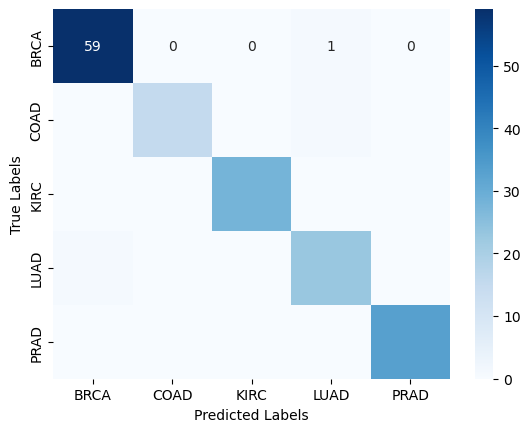

In [63]:
# Visualize the confusion matrix using seaborn
sns.heatmap(cm_df,annot=True,cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

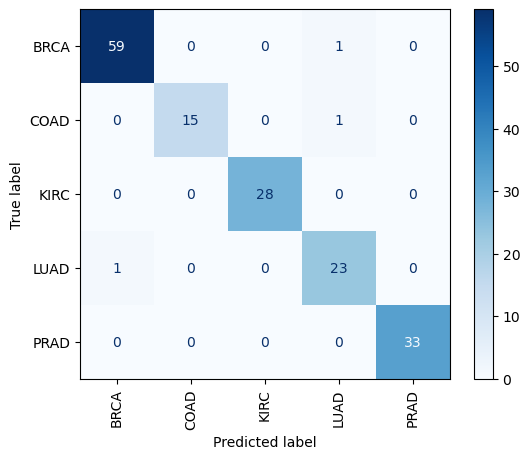

In [65]:
# Visualize the confusion matrix directly
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

# Plot the confusion matrix
disp.plot(cmap='Blues', xticks_rotation='vertical')

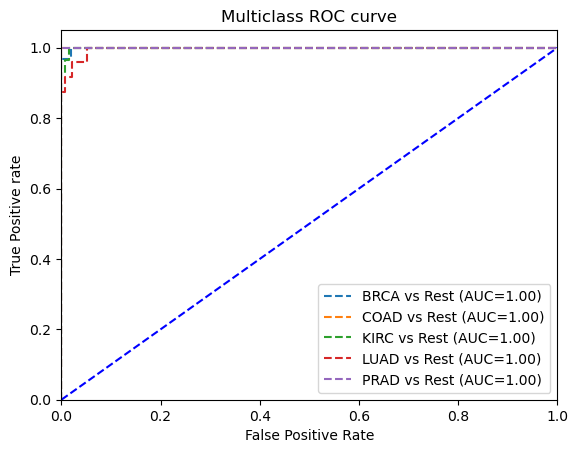

In [67]:
# roc curves will be generated for each class
# we will therefore have to binarize the y_test labels
# this is done because the probabilities(pred_prob) are calculated for each each class
# we therefore need to put the y_test label in the same format as the pred_prob
y_test_binarized=label_binarize(y_test,classes=classes)
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.2f)'%(labels[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()    